In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go

In [5]:
sankey_data = pd.read_excel('../../data/plant_assumptions.xlsx', sheet_name='sankey')
sankey_data

,Source,Value,Target,Carrier,Comment
0,Fuel Production,10.000000,Kerosene,Hydrocarbon,NaN
1,Fuel Production,7.116168,Diesel,Hydrocarbon,NaN
2,Fuel Production,5.662364,Gasoline,Hydrocarbon,NaN
3,Electrolysis,34.104969,Fuel Production,Hydrogen,NaN
4,Wind + PV,56.841614,Electrolysis,Electricity,NaN
5,Electrolysis,22.736646,Loss,Loss,NaN
6,DAC,3.104157,Loss,Loss,Electricity
7,DAC,12.416627,Loss,Loss,Heat
8,Wind + PV,3.104157,DAC,Electricity,NaN
9,Fuel Production,7.424165,DAC,Heat,NaN


In [23]:

nodes = ['Wind + PV', 'Electrolysis', 'Fuel Production', 'Loss', 'Boiler', 'Diesel', 'Gasoline', 'Kerosene', 'DAC']
node_values = [max(sankey_data.loc[sankey_data['Source']==x,'Value'].sum(), sankey_data.loc[sankey_data['Target']==x,'Value'].sum()) for x in nodes]
labels = [f'{node}<br>{value:.1f}' for node,value in zip(nodes,node_values)]
x = [0, 0.25, 0.5, 1,   0.25, 1,   1,   1,   0.75]
y = [0, 0.45,  0.1, 0.7, 1,    0.3, 0.2, 0.1, 0.95]

sources = [nodes.index(x) for x in sankey_data['Source']]
values = [x for x in sankey_data['Value']]
targets = [nodes.index(x) for x in sankey_data['Target']]

flow_color_dict = {'Hydrocarbon': '#F4974B',
 'Hydrogen': '#1D84B5',
 'Loss': '#A4A0A9',
 'Electricity': '#2A9D8F',
 'Heat': '#C45544'}
flow_colors = [flow_color_dict[x] for x in sankey_data['Carrier']]


node_color_dict = {'Wind + PV': '#2A9D8F',
 'Fuel Production': '#F4974B',
 'Loss': '#A4A0A9',
 'Electrolysis': '#1D84B5',
 'DAC': '#264653',
 'Boiler': '#C45544',
 'Diesel': '#F4974B',
 'Gasoline': '#F4974B',
 'Kerosene': '#F4974B'}
node_colors = [node_color_dict[x] for x in nodes]

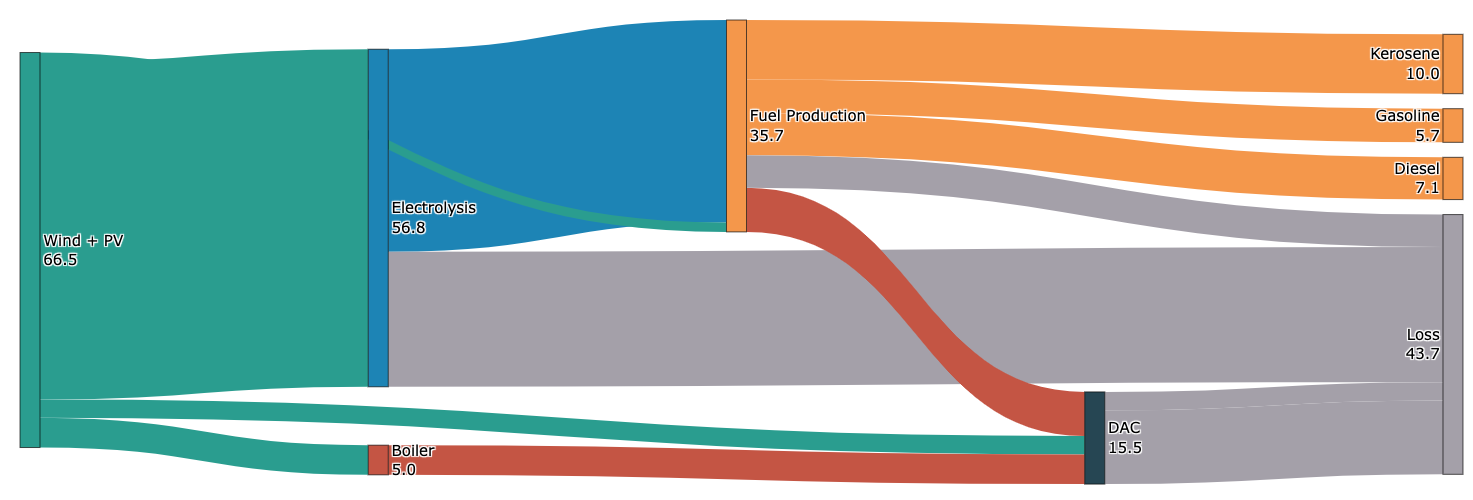

In [25]:
fig = go.Figure(data=[go.Sankey(
    arrangement = 'snap',
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      x = x,
      y = y,
      color = node_colors
    ),
    link = dict(
      source = sources, 
      target = targets,
      value = values,
      color = flow_colors
    ),
    
)])

fig.update_layout(margin=dict(l=20, r=20, t=20, b=40), font_color='black', font_family='"Open Sans", verdana, arial, sans-serif', font_size=15, width=550, height=500)
fig.show()
fig.write_image('../../gfx/Sankey.png')

In [18]:
plant_efficiency = (node_values[nodes.index('Kerosene')] + node_values[nodes.index('Diesel')] + node_values[nodes.index('Gasoline')]) / node_values[nodes.index('Wind + PV')]
print(f'Plant efficiency: {plant_efficiency * 100:.2f}%')

Plant efficiency: 34.25%
